In [1]:
# Library for linear algebra
import numpy as np
# Library and functions for the plots
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from matplotlib.image import NonUniformImage
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm

In [2]:
## Load potential, force and state
from System_informations2 import potential, state

In [3]:
def fmt(x, pos):
    # format for colorbars tick labels
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)  

In [4]:
## Temperature
temperature=1.0

In [5]:
## Dimensions of the plot
xlimleft=-2.0
xlimright=2.0
ylimdown=-1.5
ylimup=2.5
delta=0.025

In [6]:
## Parameters of plots
axisticslabelfontsize=9
axisticslabelfontsizeinset=7
axislabelfontsize=11
axislabelfontsizeinset=9
legendfontsize=7
lineswidth = 2
ncontour = 25
cmap = plt.get_cmap('RdBu') 

In [7]:
namepot="Potential"
nameGibbs="Gibbs"

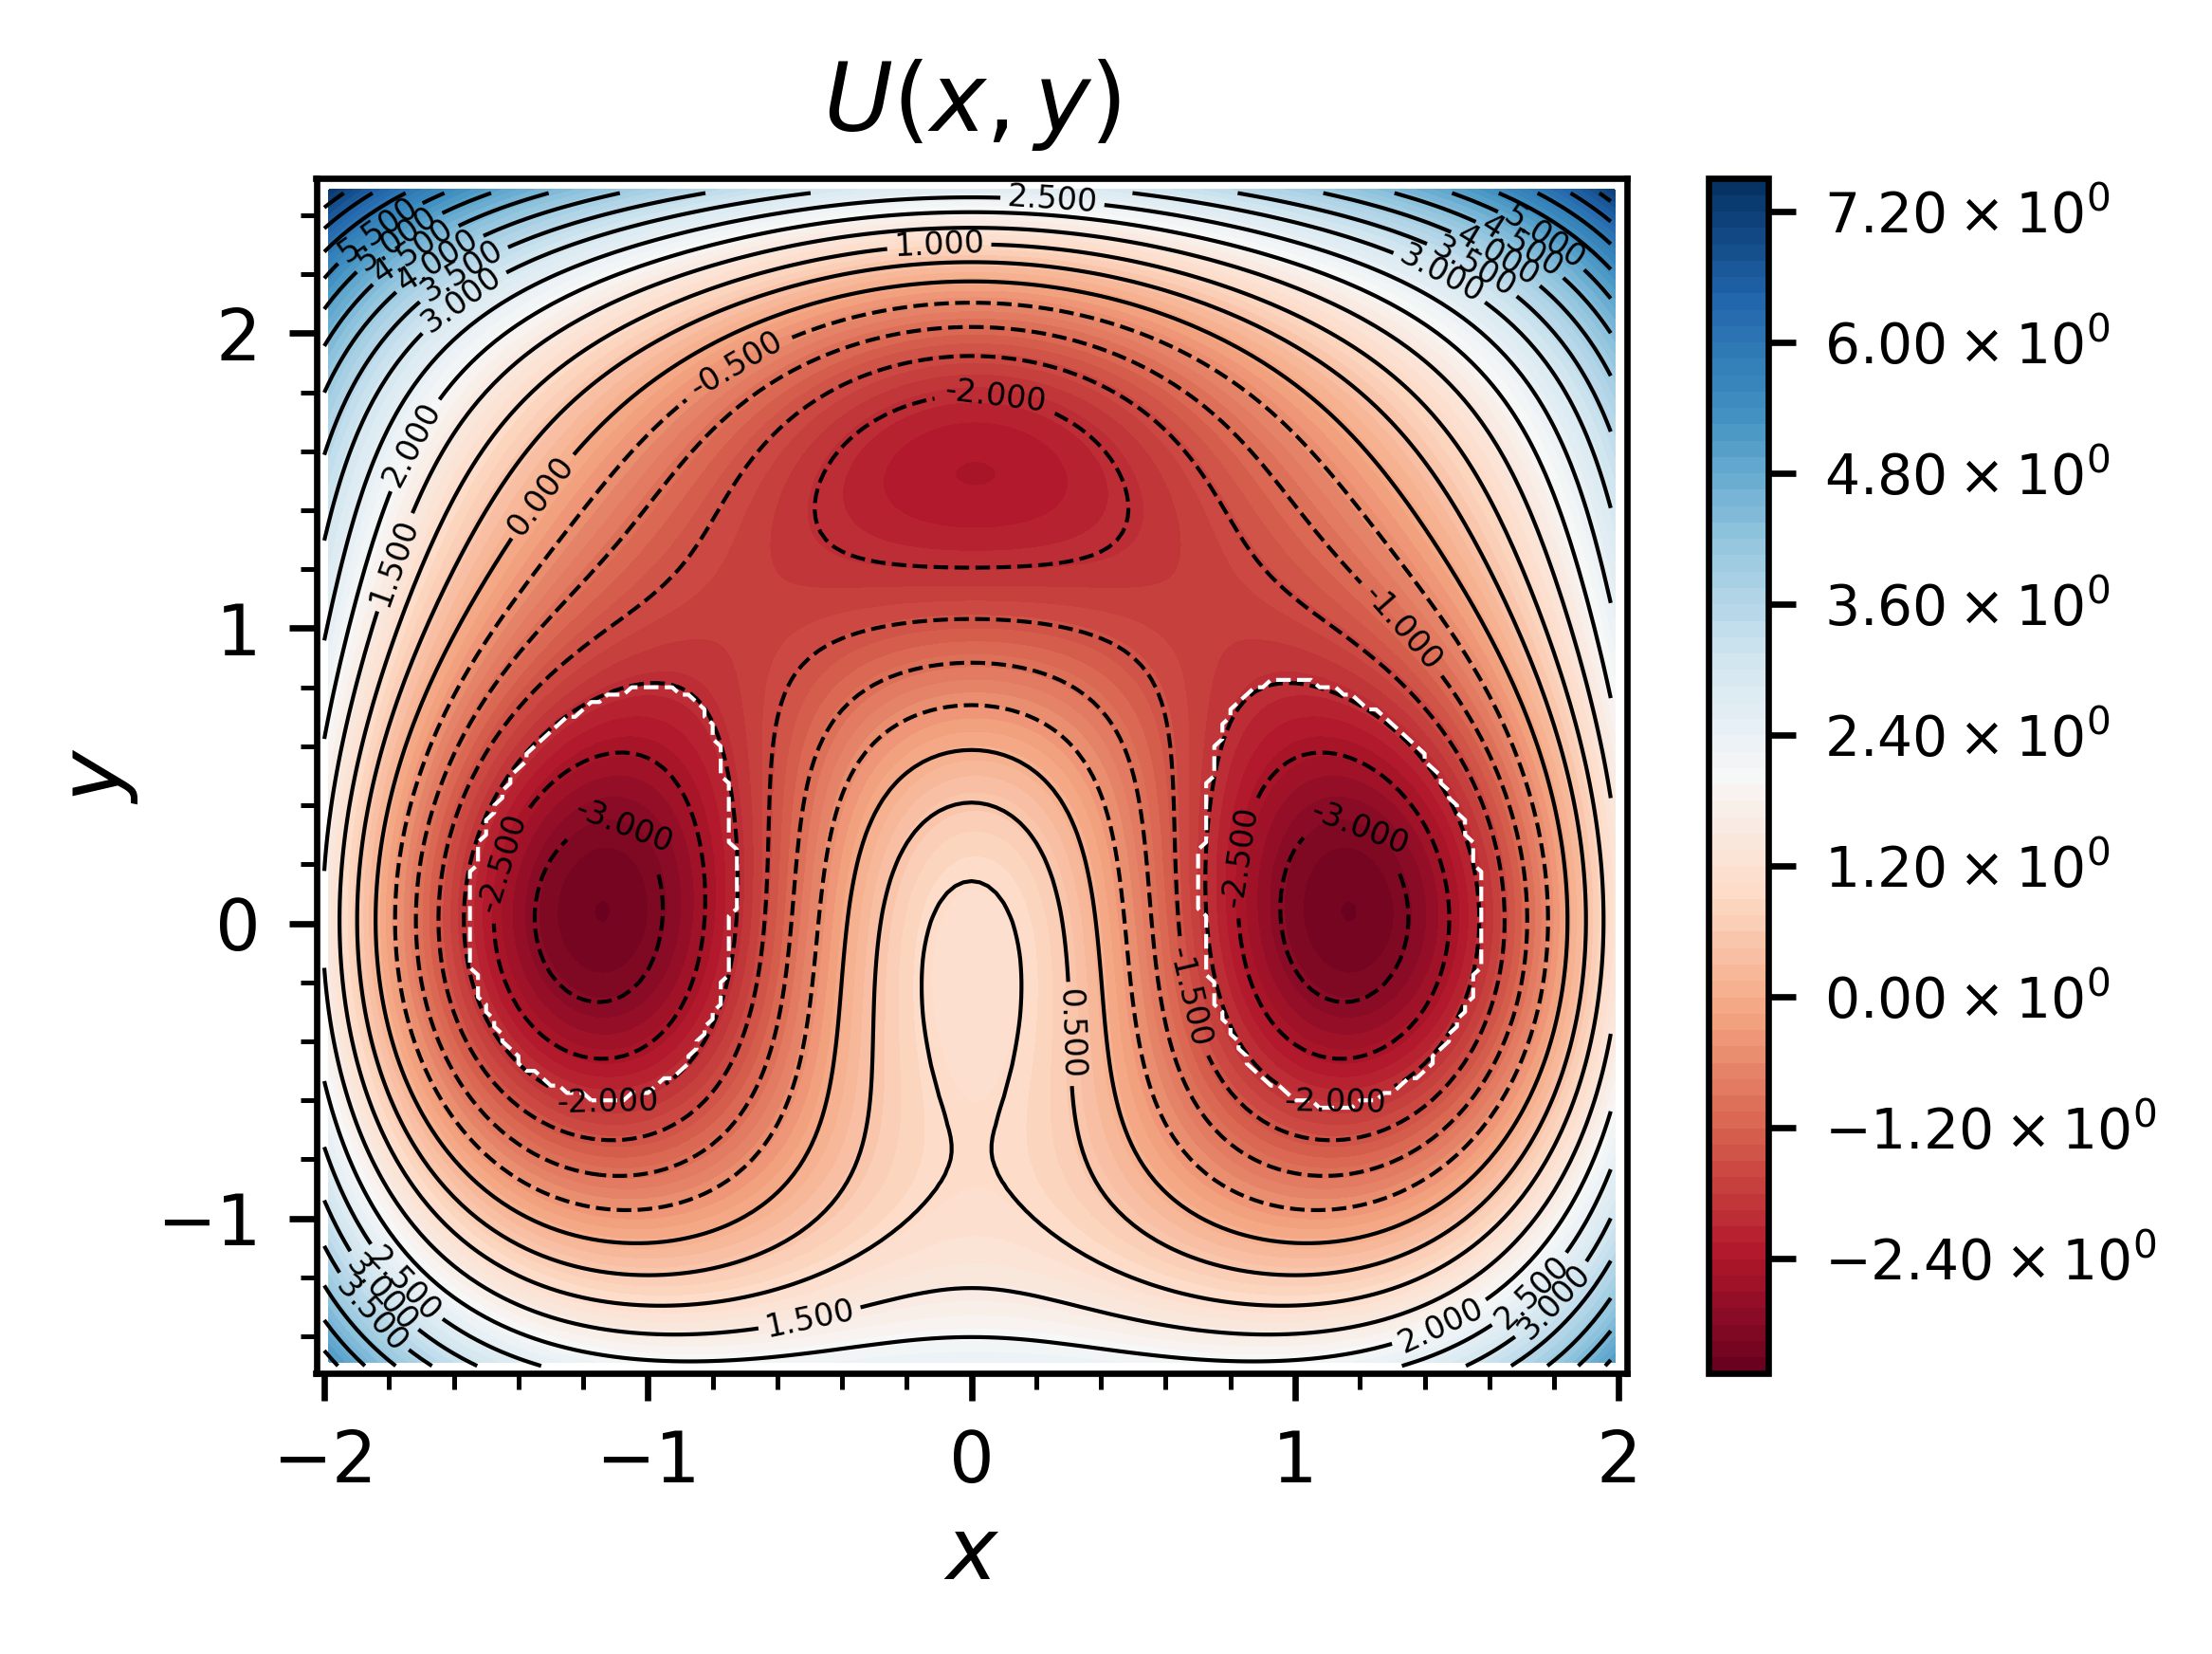

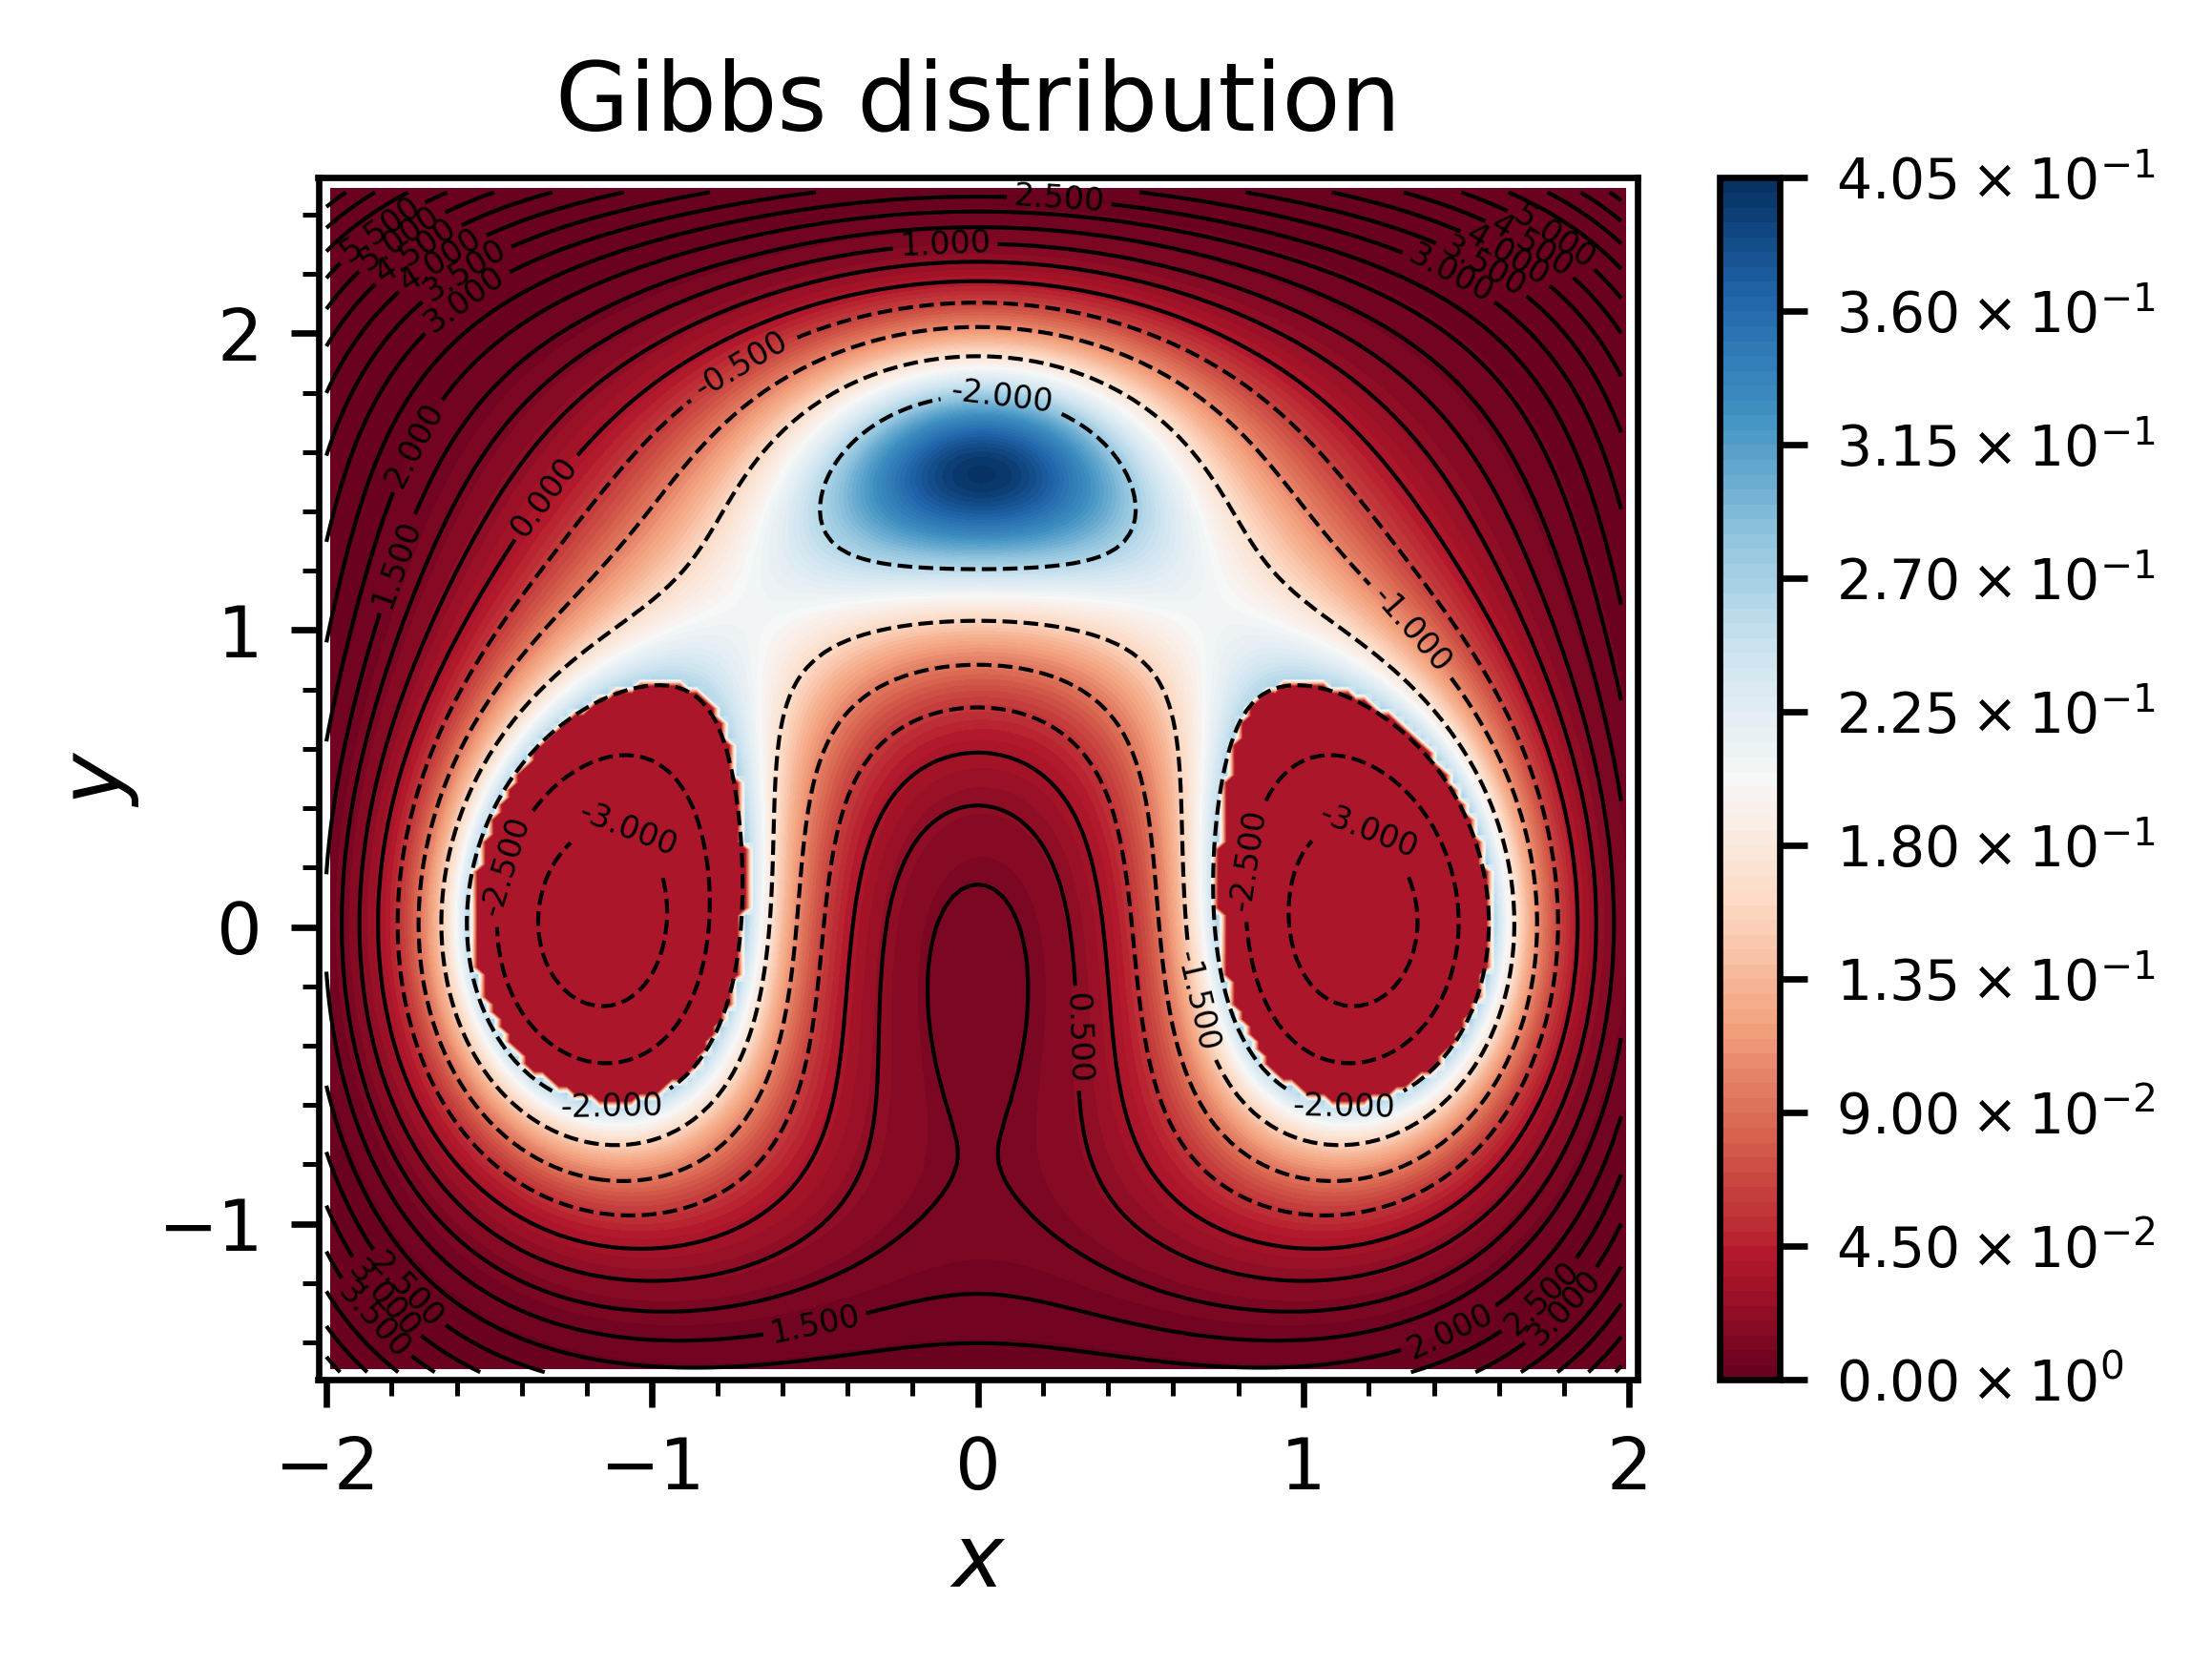

In [9]:
## Prepare the contour lines for the potential and the basins
xcontour = np.arange(xlimleft,xlimright, 0.025)
ycontour = np.arange(ylimdown,ylimup, 0.025)
X, Y = np.meshgrid(xcontour, ycontour)
# Potential
CONT = X*0
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        CONT[i,j] = potential(X[i,j],Y[i,j])
# Basins
BASINS = X*0
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        BASINS[i,j] = state(X[i,j],Y[i,j])
levelsb = [-1.0, 0.0 ,1.0] 
    
## Prepare the grid for the plots
yplot, xplot = np.mgrid[slice(ylimdown, ylimup + delta, delta),slice(xlimleft, xlimright + delta, delta)]

## I do the potential plot
# Create grid potential
Uplot = xplot*0
for i in range(xplot.shape[0]):
    for j in range(xplot.shape[1]):
        Uplot[i,j] = potential(xplot[i,j],yplot[i,j])
# x and y are bounds, so z should be the value *inside* those bounds. Therefore, remove the last value from the z array.
Uplot = Uplot[:-1, :-1]
levels = MaxNLocator(nbins=100).tick_values(Uplot.min(), Uplot.max())
# pick the sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
        
with PdfPages(namepot+".pdf") as pdf:
    fmt1 = '%r %%'
    fig = plt.figure(figsize=(4.,2.8),dpi=600)
    plt.rc('text')
    panel = fig.add_axes([0.15, 0.15, 0.72, 0.75]) # dimensions and location of the panel within the figure
    pcm = panel.contourf(xplot[:-1, :-1] + delta/2.,yplot[:-1, :-1] + delta/2., Uplot, levels=levels, cmap=cmap)
    cbar = plt.colorbar(pcm,format=ticker.FuncFormatter(fmt)) # plot colorbar and select format
    cbar.ax.tick_params(labelsize=axisticslabelfontsize-2) # dimension of the labels of the colorbar
    panel.set_xlabel(r'$x$',fontsize=axislabelfontsize,labelpad=2) # labels and ticklabels along x with their fontsize and location, x limits and same for y below
    for tick in panel.xaxis.get_major_ticks(): tick.label.set_fontsize(axisticslabelfontsize)
    panel.set_xlim(xlimleft-delta,xlimright+delta)
    panel.xaxis.set_major_locator(MultipleLocator(1))
    panel.xaxis.set_minor_locator(MultipleLocator(0.2))
    panel.set_ylabel(r'$y$',fontsize=axislabelfontsize,labelpad=2)
    for tick in panel.yaxis.get_major_ticks(): tick.label.set_fontsize(axisticslabelfontsize)
    panel.set_ylim(ylimdown-delta,ylimup+delta)
    panel.yaxis.set_major_locator(MultipleLocator(1))
    panel.yaxis.set_minor_locator(MultipleLocator(0.2))
    # Potential 
    CS = panel.contour(X, Y, CONT, ncontour, colors='k', linewidths = 0.5)
    plt.clabel(CS, fontsize=4, inline=1)
    contour = panel.contour(X, Y, BASINS,levels=levelsb,colors="white",linewidths = 0.5, linestyles='dashed')
    plt.title(r"$U(x,y)$") # title
    plt.show()
    pdf.savefig(fig)
            
## I do the Gibbs distribution plot
# Partition function
Z = 0.0
for i in range(Uplot.shape[0]):
    for j in range(Uplot.shape[1]):
        if state(xplot[i,j],yplot[i,j])==0:
            Z += np.exp(-Uplot[i,j]/temperature)*delta*delta
        else:
            Uplot[i,j]=0.0
        
Gibbs = 1.0/Z*np.exp(-Uplot/temperature)
# x and y are bounds, so z should be the value *inside* those bounds. Therefore, remove the last value from the z array.
levels = MaxNLocator(nbins=100).tick_values(Gibbs.min(), Gibbs.max())
# pick the sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
        
with PdfPages(nameGibbs+".pdf") as pdf:
    fmt1 = '%r %%'
    fig = plt.figure(figsize=(4.,2.8),dpi=600)
    plt.rc('text')
    panel = fig.add_axes([0.15, 0.15, 0.72, 0.75]) # dimensions and location of the panel within the figure
    pcm = panel.contourf(xplot[:-1, :-1] + delta/2.,yplot[:-1, :-1] + delta/2., Gibbs, levels=levels, cmap=cmap)
    cbar = plt.colorbar(pcm,format=ticker.FuncFormatter(fmt)) # plot colorbar and select format
    cbar.ax.tick_params(labelsize=axisticslabelfontsize-2) # dimension of the labels of the colorbar
    panel.set_xlabel(r'$x$',fontsize=axislabelfontsize,labelpad=2) # labels and ticklabels along x with their fontsize and location, x limits and same for y below
    for tick in panel.xaxis.get_major_ticks(): tick.label.set_fontsize(axisticslabelfontsize)
    panel.set_xlim(xlimleft-delta,xlimright+delta)
    panel.xaxis.set_major_locator(MultipleLocator(1))
    panel.xaxis.set_minor_locator(MultipleLocator(0.2))
    panel.set_ylabel(r'$y$',fontsize=axislabelfontsize,labelpad=2)
    for tick in panel.yaxis.get_major_ticks(): tick.label.set_fontsize(axisticslabelfontsize)
    panel.set_ylim(ylimdown-delta,ylimup+delta)
    panel.yaxis.set_major_locator(MultipleLocator(1))
    panel.yaxis.set_minor_locator(MultipleLocator(0.2))
    # Potential 
    CS = panel.contour(X, Y, CONT, ncontour, colors='k', linewidths = 0.5)
    plt.clabel(CS, fontsize=4, inline=1)
    plt.title("Gibbs distribution") # title
    plt.show()
    pdf.savefig(fig)